In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score
#from lightgbm import LGBMClassifier

In [ ]:
df=pd.read_csv('creditcard.csv')

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.head(1)

In [ ]:

df.describe()

# plotting the points over a scatter plot

In [ ]:
df0=df.loc[df.Class==0]
df0
df1=df.loc[df.Class==1]
df1.shape

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
new_df1=pca.fit_transform(df0)
new_df2=pca.fit_transform(df1)


In [ ]:
new_df
x1=pd.DataFrame(new_df1)
x2=pd.DataFrame(new_df2)

In [ ]:
x1

In [ ]:
plt.scatter(x1[0],x1[1],c='green')
plt.scatter(x2[0],x2[1],c='red')
plt.show()

In [ ]:
sns.distplot(x1)

In [ ]:
x=df.drop('Class',axis=1)
sns.distplot(x)
#sns.distplot(df.drop("class",axis=1))

In [ ]:
#import lightgbm as lgb

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:

df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

In [ ]:
df.head(2)

In [ ]:
df.Class.unique()
sns.countplot(df.Class)

In [ ]:
df.loc[df['Class']==0].shape
df.loc[df['Class']==1].shape

In [ ]:

df.Class.value_counts()


In [40]:
from scipy import stats as sts

In [58]:

new_df=pd.DataFrame()
new_df['feature']=df.drop(columns='Class').columns
print("the size of new_df.feature",len(new_df.feature))
pvalue=[]
stats=[]
for i in df.drop(columns='Class').columns:
    #null hypothesis: 'i' has no impact on target value
    #alternate hypothesis :'i ' has an impact on target hypothesis
    class_1=df.loc[df.Class==1,i]
    class_0=df.loc[df.Class==0,i]
    pvalue.append(sts.ttest_ind(class_1,class_0)[1])
    stats.append(sts.ttest_ind(class_1,class_0))

new_df['pvalue']=pvalue


new_df.head(2)

the size of new_df.feature 30


,feature,pvalue
0,Time,4.818269e-11
1,V1,0.000000e+00


In [67]:
selected_features=new_df.loc[new_df.pvalue<0.05]['feature'].values
                             
                            

In [75]:
list1=[]
list1.append(new_df.loc[new_df['pvalue']<0.05,'feature'])
list1
z=pd.DataFrame(list1)
z
selected_features,np.array(z)

(array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
        'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
        'V19', 'V20', 'V21', 'V24', 'V26', 'V27', 'V28', 'Amount'],
       dtype=object),
 array([['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
         'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
         'V19', 'V20', 'V21', 'V24', 'V26', 'V27', 'V28', 'Amount']],
       dtype=object))

## base model

In [87]:
x=df[selected_features]
y=df.Class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [88]:
print(x_train.shape,x_test.shape)
#x_test.value_counts(),y_test.value_counts()

(199364, 27) (85443, 27)


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
#SCALING THE DATA
sc=StandardScaler()
x_train_s=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_s=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)
x_train_s.shape,x_test_s.shape

((199364, 27), (85443, 27))

In [91]:
x_train.head(2)
x_train_s.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V24,V26,V27,V28,Amount
0,-1.122955,-0.465039,0.233742,0.867195,-1.342733,-0.585772,-0.453541,-0.288961,0.529511,-1.278458,...,-0.148030,-0.827949,0.550542,0.065954,-0.066222,-0.124928,-1.105416,0.154148,-0.170446,-0.289755
1,-0.941315,0.241408,0.790964,0.064501,2.275087,-0.036386,0.122187,-0.582070,-2.275137,-1.424263,...,0.710017,-0.860386,-0.112095,0.752446,-1.523780,0.643026,0.389549,0.528246,1.083985,-0.322023


In [92]:
x_train_s.head(2),
x_train.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V24,V26,V27,V28,Amount
43313,41458.0,-0.909470,0.384442,1.311166,-1.898812,-0.805035,-0.606640,-0.354017,0.634913,-1.405068,...,-0.122730,-0.693623,0.449092,0.052145,-0.050556,-0.075951,-0.533522,0.062706,-0.055537,15.00
62011,50089.0,0.473739,1.305237,0.099051,3.218246,-0.047329,0.160904,-0.715987,-2.742475,-1.565452,...,0.594356,-0.720764,-0.090937,0.590798,-1.123914,0.390125,0.187522,0.214719,0.350915,6.83


In [93]:
#adding constant column in x_train and x_test

import statsmodels.api as sm
x_train_s=sm.add_constant (x_train_s)
x_test_s=sm.add_constant(x_test_s)
x_test_s.columns

Index(['const', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V24', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [94]:
print(y_train)
y_train=y_train.reset_index().drop(columns='index')
y_test=y_test.reset_index().drop(columns='index')
y_train

43313     0
62011     0
177456    0
225790    0
125988    0
         ..
184518    0
60254     0
254317    0
72022     0
103798    0
Name: Class, Length: 199364, dtype: int64


,Class
0,0
1,0
2,0
3,0
4,0
...,...
199359,0
199360,0
199361,0
199362,0


In [95]:
# before model bulding we will build an evaluation function

def evaluation(y_test,y_pred):
    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    
# Our evaluation fucntion is now created

In [96]:
#fitting a model
base_model=sm.Logit(y_train,x_train_s).fit()
y_pred_proba=base_model.predict(x_test_s)

Optimization terminated successfully.
         Current function value: 0.003847
         Iterations 14


In [97]:
#summary of the model
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199336
Method:                           MLE   Df Model:                           27
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                  0.6972
Time:                        10:11:01   Log-Likelihood:                -766.91
converged:                       True   LL-Null:                       -2532.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6971      0.207    -42.024      0.000      -9.103      -8.291
Time          -0.0580      0.122     -0.476      0.634      -0.297       0.181
V1             0.0976      0.102      0.953      0.340      -0.103       0.298
V2             0.1639      0.139      1.181      0.238      -0.108       0.436
V3             0.0089      0.096      0.093      0.926      -0.180       0.198
V4             1.1777      0.171      6.894      0.000       0.843       1.513
V5             0.2570      0.125      2.049      0.040       0.011       0.503
V6            -0.2046      0.120     -1.701      0.089      -0.440       0.031
V7             0.0838      0.115      0.732      0.464      -0.141       0.308
V8            -0.2667      0.044     -6.072      0.000      -0.353      -0.181
V9             0.0767      0.187      0.409      0.683      -0.291       0.444
V10           -0.9098      0.162     -5.607      0.000      -1.228      -0.592
V11            0.0240      0.101      0.239      0.811      -0.173       0.221
V12           -0.0333      0.119     -0.280      0.779      -0.266       0.200
V13           -0.3123      0.095     -3.290      0.001      -0.498      -0.126
V14           -0.4377      0.078     -5.600      0.000      -0.591      -0.284
V15           -0.0395      0.099     -0.401      0.689      -0.233       0.154
V16           -0.3385      0.142     -2.386      0.017      -0.617      -0.060
V17           -0.0789      0.083     -0.952      0.341      -0.241       0.084
V18            0.0236      0.143      0.165      0.869      -0.257       0.304
V19           -0.0092      0.105     -0.088      0.930      -0.214       0.196
V20           -0.2231      0.092     -2.418      0.016      -0.404      -0.042
V21            0.1175      0.035      3.341      0.001       0.049       0.187
V24            0.1258      0.110      1.138      0.255      -0.091       0.342
V26           -0.0181      0.117     -0.155      0.877      -0.247       0.211
V27           -0.1777      0.081     -2.195      0.028      -0.336      -0.019
V28           -0.0381      0.043     -0.891      0.373      -0.122       0.046
Amount         0.1156      0.107      1.078      0.281      -0.095       0.326
==============================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [98]:
y_pred=[]

# Taking threshold for probability at 0.5
for i in y_pred_proba:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [99]:
# Evaluating the model
from sklearn.metrics import recall_score,precision_score
#evaluation(y_test,y_pred)
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


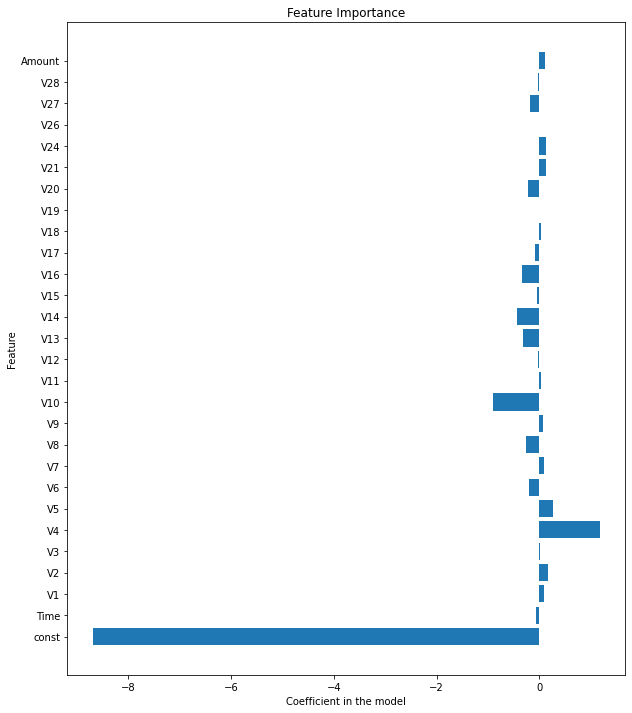

In [100]:
plt.rcParams['figure.figsize']=[10,12]
plt.barh(y=base_model.params.index,width=base_model.params.values)
plt.title('Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Coefficient in the model')
plt.show()

# decision tree

In [103]:
#since we are using decision tree we won't be needing to scale the split
# For sampling
from imblearn.over_sampling import SMOTE

In [112]:
#we will use smote to resample the data agian
smote1=SMOTE()
x_train_samp,y_train_samp=smote1.fit(x_train,y_train)

AttributeError: 'DataFrame' object has no attribute 'name'

In [ ]:

dtree=DecisionTreeClassifier(max_depth=5)
dt_model=dtree.fit(x_train_sampled,y_train_sampled)
y_pred=dt_model.predict(x_test)
# Evaluating the model
evaluation(y_test,y_pred)


# boosting

In [105]:
#for the boosting technique we will use the lightgbm framework


In [106]:
lgbm=LGBMClassifier()
lg_model=lgbm.fit(x_train_sampled,y_train_sampled)
y_pred=lg_model.predict(x_test)

NameError: name 'LGBMClassifier' is not defined

Accuracy Score: 0.9992158515033414
f1_score: 0.7563636363636365
Precision: 0.8188976377952756
Recall: 0.7027027027027027
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.70      0.76       148

    accuracy                           1.00     85443
   macro avg       0.91      0.85      0.88     85443
weighted avg       1.00      1.00      1.00     85443



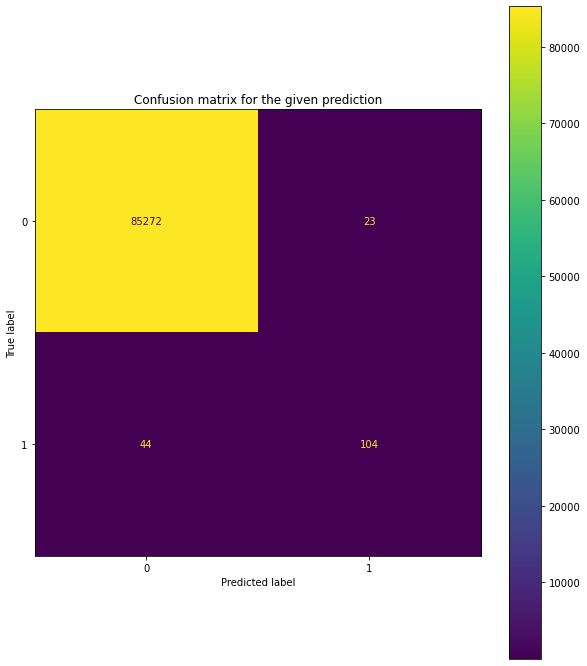

In [107]:
#model evaluation
evaluation(y_test,y_pred)

In [108]:
lgbm=LGBMClassifier(scale_pos_weight=100)
lg_model=lgbm.fit(x_train_sampled,y_train_sampled)
y_pred=lg_model.predict(x_test)

NameError: name 'LGBMClassifier' is not defined

In [ ]:
# Model evaluation
evaluation(y_test,y_pred)